# Preliminaries

In [76]:
using SHA
using DataFrames
using CSV
using Plots
using StatsBase
using Arrow

# 1 

**Use the "adult.data" file from the UCI repository. You can learn more about the dataset from "adult.names" file also available from the UCI data repository. You should download the file from the internet using Julia. For this dataset, notice that there is also an "adult.test" file in the repository. A train/test data split was already done for us, and we should keep that in mind during the modeling process. In this notebook, we will work with the training data only.**

The [`download()` function](https://docs.julialang.org/en/v1/stdlib/Downloads/#Downloads.download) downlaods a file from the given url, saving it to `output` or if not specified, a temporary path.

In [14]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
DATA = download(URL, "adult.data")

"adult.data"

# 2 

**Check that file has been fetched correctly by calculating its SHA1 hash and compare it to the following reference value:**

```
[0xee, 0x86, 0xbb, 0xe5, 0x56,
 0x57, 0x8f, 0x70, 0x9a, 0xe0,
 0xfd, 0x00, 0x2a, 0xc5, 0x8a,
 0xc9, 0x37, 0x26, 0x48, 0x2f]
```

The [`sha1()` function](https://docs.julialang.org/en/v1/stdlib/SHA/#SHA) calculates a SHA1 hash.

In [15]:
expected = [
    0xee, 0x86, 0xbb, 0xe5, 0x56,
    0x57, 0x8f, 0x70, 0x9a, 0xe0,
    0xfd, 0x00, 0x2a, 0xc5, 0x8a,
    0xc9, 0x37, 0x26, 0x48, 0x2f
]
sum(expected)

0x0000000000000a4d

## Opening a file

We open the data file by creating an anonymous functiong using [`do` keyword](https://docs.julialang.org/en/v1/base/base/#do) and the [`open()` function](https://docs.julialang.org/en/v1/base/io-network/#Base.open). The `do` keyword creates an anonymous function and passes it as the first argument to a function call.  

*Note: the `DATA` variable is just a path to local file.*

Here we compare the actual SHA1 hash with the expected value:

In [17]:
open(DATA) do f
    actual = sum(sha1(f))
    sum(actual) == sum(expected)
end

true

# 3 

**Load the data into Julia's DataFrame. Note that missing values are denoted by ? in the CSV files.**

The housing data is comma-delimited and stored in the local file: `adult.data`.

To load our data into a `DataFrame`, we must first read it using [`CSV.File()` function](https://csv.juliadata.org/stable/reading.html#CSV.File). We pass in the filepath and an array of column names (data does not have a header).

In [20]:
col_names = [
    "age", "workclass", "fnlwgt", "education", 
    "education-num", "marital-status", "occupation", "relationship",
    "race", "sex", "capital-gain", "capital-loss", "hours-per-week",
    "native-country", "income"
]

adult = DataFrame(CSV.File(DATA, header=col_names))

,age,workclass,fnlwgt,education,education-num,marital-status
,Int64,String31,Int64,String15,Int64,String31
1,39,State-gov,77516,Bachelors,13,Never-married
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse
3,38,Private,215646,HS-grad,9,Divorced
4,53,Private,234721,11th,7,Married-civ-spouse
5,28,Private,338409,Bachelors,13,Married-civ-spouse
6,37,Private,284582,Masters,14,Married-civ-spouse
7,49,Private,160187,9th,5,Married-spouse-absent
8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse
9,31,Private,45781,Masters,14,Never-married


# 4 

**Adjust the number of columns printed by Jupyter Notebook to 200 and the number of rows to 20. This is an often needed quality of life adjustment that will allow you to display tabular data in friendlier way.**

By default Jupyter Notebook will limit the number of rows and columns when displaying a data frame to roughly fit the screen size (like in the REPL).

You can override this behavior by changing the values of the `ENV["COLUMNS"]` and `ENV["LINES"]` variables to hold the maximum width and height of output in characters respectively.

In [22]:
ENV["COLUMNS"] = 200
ENV["LINES"] = 20

20

In [25]:
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
,Int64,String31,Int64,String15,Int64,String31,String31,String15,String31,String7,Int64,Int64,Int64,String31
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
7,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
9,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States


# 5

**Drop the :fnlwgt variable from the analysis, as we will not use this technical column during prediction on our database.**

We'll use the [`select!()` function](https://dataframes.juliadata.org/stable/lib/functions/#DataFrames.select), with bang syntax `!` to select in-place, to select all columns except feature `B`. The [`Not()` column selector](https://dataframes.juliadata.org/stable/man/basics/#Not,-Between,-Cols,-and-All-Column-Selectors) lets us specify all columns except `B`.

In [26]:
select!(adult, Not(:fnlwgt))

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
,Int64,String31,String15,Int64,String31,String31,String15,String31,String7,Int64,Int64,Int64,String31
1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
6,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
7,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
8,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
9,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States


# 6 

**Examine the basic descriptive statistics of the training dataset using the describe function. We plan to use tree-based models capable of handling missing values, so we can leave this data as-is. Missing values are often either imputed or removed from the dataset, but it’s important to think holistically about the modeling process and take further steps into account.**

In [27]:
describe(adult)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,age,38.5816,17,37.0,90,0,Int64
2,workclass,,?,,Without-pay,0,String31
3,education,,10th,,Some-college,0,String15
4,education-num,10.0807,1,10.0,16,0,Int64
5,marital-status,,Divorced,,Widowed,0,String31
6,occupation,,?,,Transport-moving,0,String31
7,relationship,,Husband,,Wife,0,String15
8,race,,Amer-Indian-Eskimo,,White,0,String31
9,sex,,Female,,Male,0,String7


# 7

**Get a list of qualitative (categorical) variables in this dataset. They are represented by string values.**

We can broadcast the [`eltype()` function](https://docs.julialang.org/en/v1/base/collections/#Base.eltype) using `.()` dot syntax over each column of the `adult` dataframe to return a vector of datatypes.

We'll use the [`supertype()` function](https://docs.julialang.org/en/v1/base/base/#Base.supertype) to return a boolean mask of `InlineString` types; this seems to cover all variations of type `String` (e.g. `String7`, `String31`, etc).

In [75]:
cat_idx = supertype.(eltype.(eachcol(adult))) .== InlineString
cat_vars = names(adult)[cat_idx]

9-element Vector{String}:
 "workclass"
 "education"
 "marital-status"
 "occupation"
 "relationship"
 "race"
 "sex"
 "native-country"
 "income"

# 8

**Explore the size of each category for qualitative variables (produce bar plots and frequency tables). Analysis shows that we have a problem with imbalanced features, which may affect the quality of the produced model.**

We define a function `freq_table()` which takes a `DataFrame` and column name as parameters, and returns a `DataFrame` grouped by column, aggregated and sorted by count.

In [143]:
function freq_table(data, col)
    grouped = combine(groupby(data, col), nrow)
    sort!(grouped, :nrow, rev=true)
    rename!(grouped, "nrow" => "count")
end

freq_table (generic function with 1 method)

In [144]:
for var in cat_vars
    show(freq_table(adult, var))
    print("\n")
    print("\n")
end

9×2 DataFrame
 Row │ workclass          count 
     │ String31           Int64 
─────┼──────────────────────────
   1 │  Private           22696
   2 │  Self-emp-not-inc   2541
   3 │  Local-gov          2093
   4 │  ?                  1836
   5 │  State-gov          1298
   6 │  Self-emp-inc       1116
   7 │  Federal-gov         960
   8 │  Without-pay          14
   9 │  Never-worked          7

16×2 DataFrame
 Row │ education      count 
     │ String15       Int64 
─────┼──────────────────────
   1 │  HS-grad       10501
   2 │  Some-college   7291
   3 │  Bachelors      5355
   4 │  Masters        1723
   5 │  Assoc-voc      1382
   6 │  11th           1175
   7 │  Assoc-acdm     1067
   8 │  10th            933
   9 │  7th-8th         646
  10 │  Prof-school     576
  11 │  9th             514
  12 │  12th            433
  13 │  Doctorate       413
  14 │  5th-6th         333
  15 │  1st-4th         168
  16 │  Preschool        51

7×2 DataFrame
 Row │ marital-status          co

We define a function `barplot_grid()` which takes a `DataFrame` plots a grid of barplots using output of the `freq_table()` function, above.

In [147]:
function barplot_grid(data::DataFrame)
    p = [bar(eachcol(freq_table(data, col))..., rotation=55, title=col, label=nothing) for col in names(data)]
    plot(p..., layout=ncol(data), size=(800,800), titlefontsize=8, tickfontsize=6)
end

barplot_grid (generic function with 1 method)

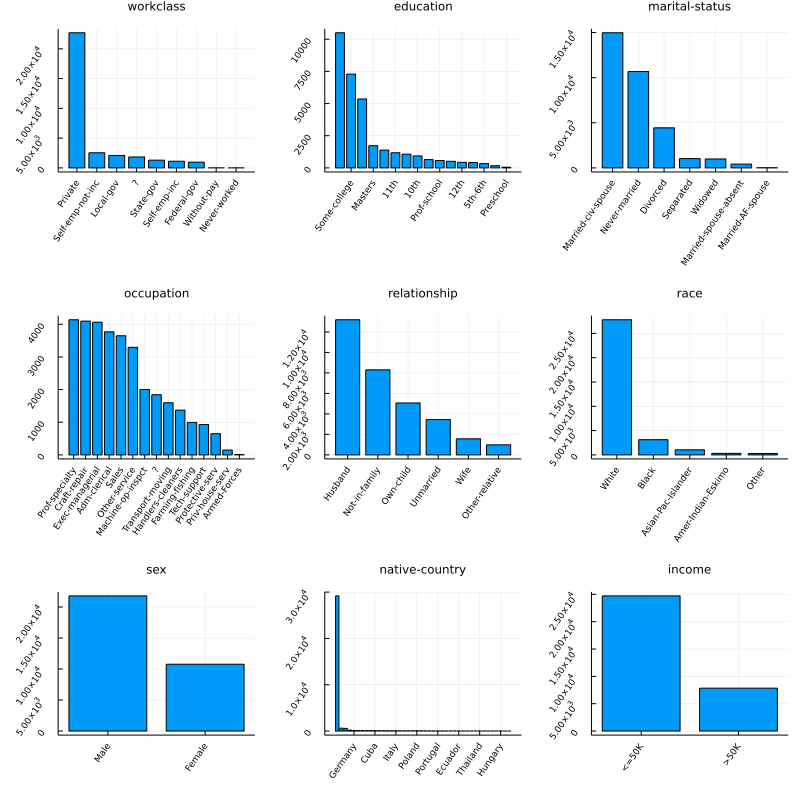

In [148]:
barplot_grid(adult[:, cat_idx])

# 9

**Collapse classes in native_country to United-States and not-United-States. Check the resulting distribution of the variable. Such transformations to collapse several levels into one in the features are quite common in practice.**

If we check the unique values in `"native-country"` column, we see each string is preceded by whitespace; we'll use the [`strip()` function and dot syntax `.()`](https://docs.julialang.org/en/v1/base/strings/#Base.strip) to remove the extra whitespace. 

The [`ifelse()` function](https://docs.julialang.org/en/v1/base/base/#Core.ifelse) returns x if condition is true, otherwise return y. We'll use this inside a list comprehension to replace any non US country with `"not-United-States"`.

In [150]:
unique(adult[:, "native-country"])

42-element Vector{String31}:
 " United-States"
 " Cuba"
 " Jamaica"
 " India"
 " ?"
 " Mexico"
 " South"
 " Puerto-Rico"
 ⋮
 " Greece"
 " Nicaragua"
 " Vietnam"
 " Hong"
 " Ireland"
 " Hungary"
 " Holand-Netherlands"

In [153]:
adult[:, "native-country"] = strip.(adult[:, "native-country"])

32561-element Vector{SubString{String31}}:
 "United-States"
 "United-States"
 "United-States"
 "United-States"
 "Cuba"
 "United-States"
 "Jamaica"
 "United-States"
 ⋮
 "United-States"
 "United-States"
 "United-States"
 "United-States"
 "United-States"
 "United-States"
 "United-States"

In [154]:
adult[:, "native-country"] = [ifelse(x=="United-States", x, "not-United-States") for x in adult[:, "native-country"]]

32561-element Vector{AbstractString}:
 "United-States"
 "United-States"
 "United-States"
 "United-States"
 "not-United-States"
 "United-States"
 "not-United-States"
 "United-States"
 ⋮
 "United-States"
 "United-States"
 "United-States"
 "United-States"
 "United-States"
 "United-States"
 "United-States"

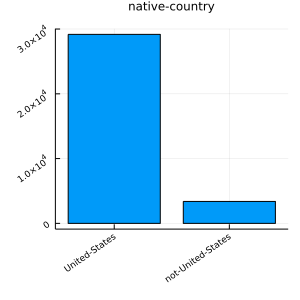

In [164]:
bar(
    eachcol(freq_table(adult, "native-country"))..., 
    rotation=35, 
    title="native-country", 
    label=nothing, 
    size=(300,300), 
    titlefontsize=8, 
    tickfontsize=6
)

# 10

**Create a two-way table for maritial_status and relationship to check how closely they are related and whether they are consistent.**

Like previous frequency tables, we use `combine()` and `groupby()` to group and aggregate our data (by count). This leaves us with a long-format dataframe, so we pivot using the [`unstack()` function](https://dataframes.juliadata.org/stable/lib/functions/#DataFrames.unstack), passing the grouped dataframe, the column containing row keys, the column for column keys, and the column containing values.

In [175]:
grouped = combine(groupby(adult, ["marital-status", "relationship"]), nrow)
unstack(grouped, "marital-status", "relationship", "nrow")

,marital-status,Not-in-family,Own-child,Unmarried,Other-relative,Husband,Wife
,String31,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?
1,Never-married,4706,4485,881,611,missing,missing
2,Married-civ-spouse,17,95,missing,124,13184,1556
3,Divorced,2404,328,1601,110,missing,missing
4,Married-spouse-absent,211,45,130,32,missing,missing
5,Separated,420,99,451,55,missing,missing
6,Married-AF-spouse,missing,1,missing,1,9,12
7,Widowed,547,15,383,48,missing,missing


# 11

**Prepare histograms of all the continuous variables in the dataset. Analyze the distribution of capital_gain. What conclusions can be drawn?**

We use the $\notin$ operator (called with `\notin` followed by TAB) and list comprehension to create an array of remaining variables not in the array of categorical variables. 

We'll reuse the `histogram_grid()` function, defined during the housing data preprocessing.

In [190]:
num_vars = [c for c in names(adult) if c ∉ cat_vars]

5-element Vector{String}:
 "age"
 "education-num"
 "capital-gain"
 "capital-loss"
 "hours-per-week"

In [193]:
function histogram_grid(data::DataFrame)
    p = [histogram(series, title=col, label=nothing, bins=30) for (col, series) in pairs(eachcol(data))]
    plot(p..., layout=ncol(data), size=(800,500), titlefontsize=8)
end

histogram_grid (generic function with 1 method)

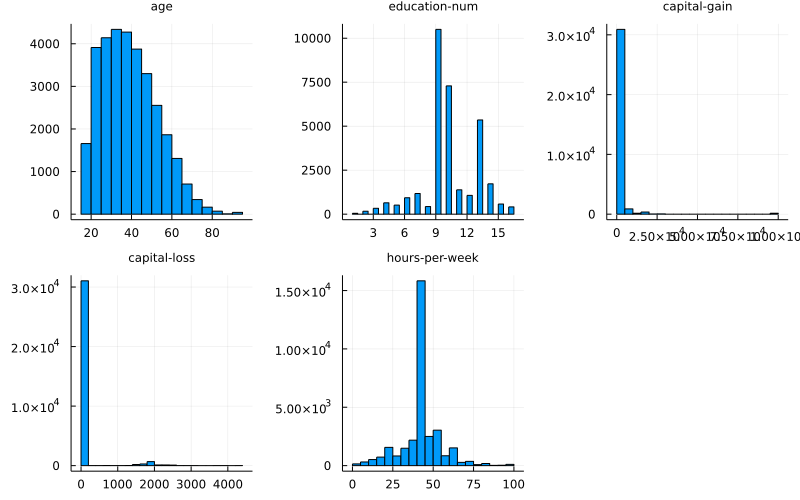

In [194]:
histogram_grid(adult[:, num_vars])

# 12

**For the :capital_gain and :capital_loss variables, calculate the probability of 0**


In [202]:
sum(adult[:, "capital-gain"] .== 0) / nrow(adult)

0.9167101747489328

In [203]:
sum(adult[:, "capital-loss"] .== 0) / nrow(adult)

0.9533490986149074

# 13

**Calculate the probability of :capital_gain and :capital_loss equal to 0 conditional on the value of :target. What conclusions can be drawn? You should receive results similar to as depicted below.**

We group the `adult` dataframe by `"income"`, then aggregate by applying an anonymous function to each column in `["capital-gain", "capital-loss"]`. The anonymous function sums the boolean vector where each element equals 0, and then divides by the total length of that vector; this calculates the probability of gain/loss equal to 0 conditioned on the `"income"` category.

In [247]:
combine(
    groupby(adult, ["income"]), 
    ["capital-gain", "capital-loss"] .=> (x -> sum(x .== 0)/length(x))
)

,income,capital-gain_function,capital-loss_function
,String7,Float64,Float64
1,<=50K,0.958131,0.969822
2,>50K,0.786124,0.901416


# 14

**Save the final dataset in Apache Arrow format.**

We use [`Arrow.write()` function](https://arrow.juliadata.org/stable/manual/#Arrow.write) to write our final dataframe to the Apache Arrow format.

In [248]:
Arrow.write("adult.arrow", adult)

"adult.arrow"